# Outlier Detection Techniques (Unsupervised Learning)


## IsolationForest

The IsolationForest ‘isolates’ observations by **randomly selecting a feature** and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This **path length**, averaged over a forest of such random trees, is **a measure of normality and our decision function**. Random partitioning produces noticeable **shorter paths for anomalies**. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

### reference

http://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(500, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(100, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [2]:
X_train.shape, X_test.shape, X_outliers.shape

((1000, 2), (200, 2), (20, 2))

In [30]:
# fit the model
clf = IsolationForest(random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [4]:
y_pred_test[:5]

array([1, 1, 1, 1, 1])

In [5]:
y_pred_outliers[:5]

array([-1, -1, -1,  1, -1])

In [31]:
TP = len([x for x in y_pred_outliers if x == -1])
FP = len([x for x in y_pred_test if x == -1])

In [32]:
'precison =', float(TP)/(TP+FP), 'recall = ', float(TP)/len(X_outliers)

('precison =', 0.4318181818181818, 'recall = ', 0.95)

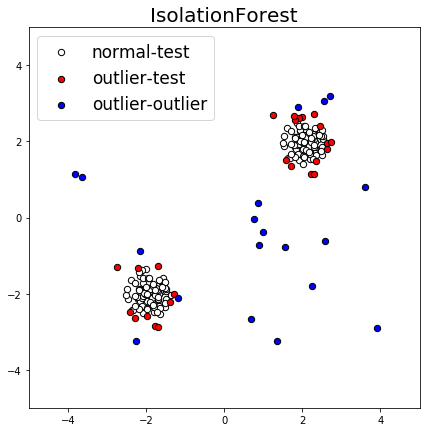

In [39]:
outlier_test = []
normal_test = []
for i in range(len(X_test)):
    if y_pred_test[i] == -1:
        outlier_test.append(X_test[i])
    else:
        normal_test.append(X_test[i])
        
outlier_outlier = []
normal_outlier = []
for i in range(len(X_outliers)):
    if y_pred_outliers[i] == -1:
        outlier_outlier.append(X_outliers[i])
    else:
        normal_outlier.append(X_outliers[i])
        
plt.figure(figsize=(7,7))
b1 = plt.scatter(np.array(normal_test)[:, 0], np.array(normal_test)[:, 1], c='white', s=40, edgecolor='k')
b2 = plt.scatter(np.array(outlier_test)[:, 0], np.array(outlier_test)[:, 1], c='red', s=40, edgecolor='k')
b3 = plt.scatter(np.array(outlier_outlier)[:, 0], np.array(outlier_outlier)[:, 1], c='blue', s=40, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, b3],
           ["normal-test", "outlier-test", "outlier-outlier"],
           loc="upper left", fontsize=17)
plt.title("IsolationForest", fontsize=20)
plt.show()


# Local Outlier Factor (LOF) estimator

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

he number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [40]:
from sklearn.neighbors import LocalOutlierFactor

In [41]:
clf = LocalOutlierFactor(n_neighbors=20)
y_pred_train = clf.fit_predict(X_train)
y_pred_test = clf.fit_predict(X_test)
# y_pred_outliers = y_pred[200:]

In [42]:
y_pred_outliers = y_pred_train[200:]

In [44]:
X_train.shape

(1000, 2)

In [43]:
len(y_pred_outliers)

800

In [45]:
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]


In [46]:
X.shape

(220, 2)

In [47]:
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]

In [48]:
y_pred_outliers 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1])